# Basic Agent Based Modelling

source: https://youtube.com/playlist?list=PLD4TWcPfbZO9HmaSutF_R2Y2RmiNDxvaP

## Lecture 1: Introduction to simulation

In [ ]:
import numpy as np;
import matplotlib.pyplot as plt;
plt.style.use("ggplot");

### 1. Data manipulation

1. Changing primitive data types does not effect other agents
2. Changing data within **a shared reference object** effect all

In [ ]:
class Data():
  def __init__(self, v) -> None:
    self.v = v;

class Agent():
  def __init__(self, v, data) -> None:
    self.v = v;
    self.data = data;

In [ ]:
v, data = 1, Data(1);

A = Agent(v, data);
B = Agent(v, data);

print("A.v: ", A.v, "A.data.v: ", A.data.v);
print("B.v: ", B.v, "B.data.v: ", B.data.v);

A.v:  1 A.data.v:  1
B.v:  1 B.data.v:  1


In [ ]:
# only A is modified
A.v = 2;
A.data.v = 3;

# changing data within a shared reference object A.data.v effect all A and B
print("A.v: ", A.v, "A.data.v: ", A.data.v);
print("B.v: ", B.v, "B.data.v: ", B.data.v);

A.v:  2 A.data.v:  3
B.v:  1 B.data.v:  3


### 2. Agent Class Contagion

#### Social Simulation of Infection

##### Agent:
- Data: `(int) ID`, `(boolean) infected`
- Method: `hand_shake`

In [ ]:
from traitlets.traitlets import Bool
class Agent():
  def __init__(self, ID, infected = False) -> None:
    self.ID = ID;
    self.infected = infected;
  
  def hand_shake(self, other_agent) -> bool:
    if (other_agent.infected == True):
      self.infected = True;

###### Scenario 2 agents

In [ ]:
U = Agent(ID = 9);
H = Agent(ID = 7, infected = True);

In [ ]:
U.infected  # is agent U infected?

False

In [ ]:
H.infected  # is agent H infected?

True

In [ ]:
U.hand_shake(H);    # H infect U by hand_shake() method
U.infected          # is agent U infected after the hand_shake()?

True

###### Scenario 3 agents

In [ ]:
U = Agent(ID = 9);
I = Agent(ID = 8);
H = Agent(ID = 7, infected = True);

In [ ]:
I.infected  # is agent I infected?

False

In [ ]:
U.hand_shake(I);    # U hand_shake() with I
I.infected          # is agent I infected after the hand_shake()?

False

In [ ]:
H.infected  # is agent H infected?

True

In [ ]:
I.hand_shake(H);    # I hand_shake() with H
I.infected          # is agent I infected after the hand_shake()?

True

### 3. World Class Contagion

##### World:
- Data: `(list) population_of_agents`
- Method: `run`

In [ ]:
# default value
no_of_population = 40;
no_of_max_iteration = 100;

class World():
  def __init__(self, N = no_of_population) -> None:
    self.N = N;
    self.population = [Agent(ID = i) for i in range(self.N)];

    poor_guy = self.population[0];
    poor_guy.infected = True;

    # store no. of infected agent
    self.contagion = [self.get_number_of_infected()]; 
  
  def get_number_of_infected(self) -> int:
    return np.sum([i.infected for i in self.population]);
  
  def run(self, time = no_of_max_iteration) -> None:
    for i in range(time):
      # randomly select a pair agent to interact
      A, B = np.random.choice(self.population, 2, replace=False);
      A.hand_shake(B);
      B.hand_shake(A);

      self.contagion.append(self.get_number_of_infected());

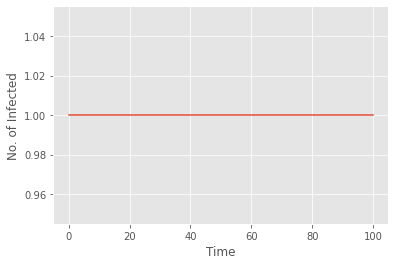

In [ ]:
simulation = World(N = 500);
simulation.run(time = 100);

# plot it
plt.plot(simulation.contagion);
plt.xlabel("Time"); plt.ylabel("No. of Infected");
plt.show();

### 4. Infection Simulation

In [ ]:
# default value
no_of_population = 40;
no_of_max_iteration = 100;

class World():
  def __init__(self, N = no_of_population) -> None:
    self.N = N;
    self.population = [Agent(ID = i) for i in range(self.N)];

    poor_guy = self.population[0];
    poor_guy.infected = True;

    # store no. of infected agent
    self.contagion = [self.get_number_of_infected()]; 
  
  def get_number_of_infected(self) -> int:
    return np.sum([i.infected for i in self.population]);
  
  def run(self, time = no_of_max_iteration) -> None:
    for i in range(time):
      # randomly select a pair agent to interact
      A, B = np.random.choice(self.population, 2, replace=False);
      A.hand_shake(B);
      B.hand_shake(A);

      self.contagion.append(self.get_number_of_infected());

In [ ]:
# what is the probability to taking infected agent?
# prob(infected) = 1 - prob(non-infected) = 1 - (prob_infected_interaction * prob_non_infected_interaction)
no_of_population = 500;
no_of_initial_infected = 1;
prob_infected = 1 - (((no_of_population - no_of_initial_infected)/no_of_population)*((no_of_population - 2 * no_of_initial_infected)/(no_of_population - no_of_initial_infected)));
prob_infected

0.0040000000000000036

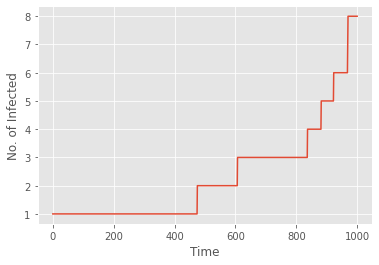

In [ ]:
simulation = World(N = 500);
simulation.run(time = 1000);

# plot it
plt.plot(simulation.contagion);
plt.xlabel("Time"); plt.ylabel("No. of Infected");
plt.show();

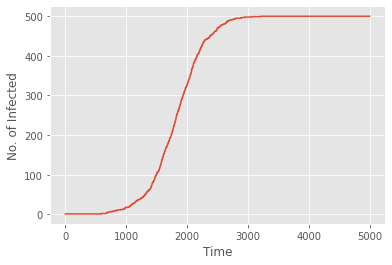

In [ ]:
# saturated condition
simulation = World(N = 500);
simulation.run(time = 5000);

# plot it
plt.plot(simulation.contagion);
plt.xlabel("Time"); plt.ylabel("No. of Infected");
plt.show();

## Lecture 2: Culture model

In [ ]:
import numpy as np;
import random;
from PIL import Image;

import matplotlib.pyplot as plt;
plt.style.use("ggplot");
%matplotlib inline

### 1. Into to Code

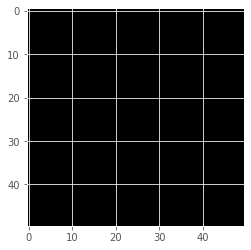

In [ ]:
""" Similarity:
    - Geographic similarity: nearby neighbors becomes similar
    - Ideological similarity: people of similar interests becomes more similar """

""" RGB Coloring (represent 3 values of culture) ∊ {0, 255}
    [0,     0,    0]  >> Black
    [0,     0,  255]  >> Blue
    [255, 255,  255]  >> White """

dimension = 50;
value = 3;

env = np.zeros([dimension, dimension, value], dtype = np.uint8);   # [0, 0, 0] >> Black
plt.imshow(env);

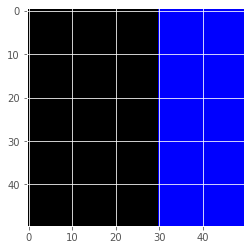

In [ ]:
# changes the color partially
env[:,30:] = [0, 0, 255];  # as Blue
plt.imshow(env);

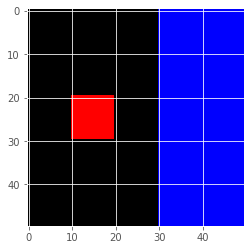

In [ ]:
# changes the color in specific coordinate

def get_coordinate(x1, x2, delta = 10) -> list:
  return x1*delta, (x1 + 1)*delta, x2*delta, (x2 + 1)*delta;

val1, val2, val3, val4 = get_coordinate(x1 = 2, x2 = 1);
env[val1:val2, val3:val4] = [255, 0, 0];   # Red
plt.imshow(env);

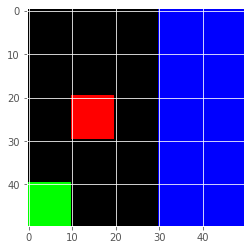

In [ ]:
# changes the color in specific coordinate
val1, val2, val3, val4 = get_coordinate(x1 = 4, x2 = 0);
env[val1:val2, val3:val4] = [0, 255, 0];   # Green
plt.imshow(env);

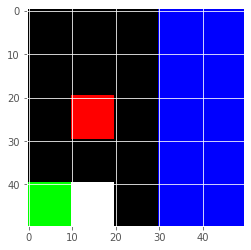

In [ ]:
# changes the color in specific coordinate
val1, val2, val3, val4 = get_coordinate(x1 = 4, x2 = 1);
env[val1:val2, val3:val4] = [255, 255, 255];   # Green
plt.imshow(env);

### 2. Code Environment

####2.1. Method for coloring

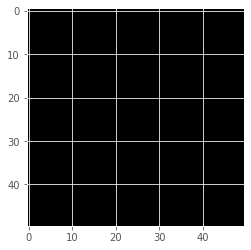

In [ ]:
dimension = 50;
value = 3;

env = np.zeros([dimension, dimension, value], dtype = np.uint8);   # [0, 0, 0] >> Black
plt.imshow(env);

In [ ]:
def get_coordinate(x1, x2, delta = 10) -> list:
  return x1*delta, (x1 + 1)*delta, x2*delta, (x2 + 1)*delta;
  
def set_color(env = env, x1 = 0, x2 = 0, delta = 10, colors = [0, 0, 0]) -> None:
  val1, val2, val3, val4 = get_coordinate(x1 = x1, x2 = x2);
  env[val1:val2, val3:val4] = colors;

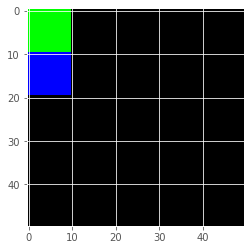

In [ ]:
green = [0, 255, 0];
set_color(x1 = 0, x2 = 0, colors = green);

blue = [0, 0, 255];
set_color(x1 = 1, x2 = 0, colors = blue);

plt.imshow(env);

####2.2. Method to find neighbors coordinate

In [ ]:
# find the neighbors 
def get_neighbors(val1, val2):
  return [
          (val1 - 1, val2 - 1),
          (val1 - 1, val2),
          (val1 - 1, val2 + 1),
          (val1, val2 - 1),
          (val1, val2 + 1),
          (val1 + 1, val2 - 1),
          (val1 + 1, val2),
          (val1 + 1, val2 + 1)
          ];

In [ ]:
coord_list = get_neighbors(val1 = 2, val2 = 1);
print(coord_list);

[(1, 0), (1, 1), (1, 2), (2, 0), (2, 2), (3, 0), (3, 1), (3, 2)]


In [ ]:
# problem at corners
coord_list = get_neighbors(val1 = 0, val2 = 0);
print(coord_list);

[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]


In [ ]:
# purpass the limit
coord_list = get_neighbors(val1 = 4, val2 = 4);
print(coord_list);

[(3, 3), (3, 4), (3, 5), (4, 3), (4, 5), (5, 3), (5, 4), (5, 5)]


In [ ]:
# find the neighbors (improvement)
def get_neighbors(val1, val2, v1_max = 5, v2_max = 5):
  ans = [(val1 - 1, val2 - 1),
         (val1 - 1, val2),
         (val1 - 1, val2 + 1),
         (val1, val2 - 1),
         (val1, val2 + 1),
         (val1 + 1, val2 - 1),
         (val1 + 1, val2),
         (val1 + 1, val2 + 1)];
  # filtering the coordinates
  ans = [(i, j) for i, j in ans if i >= 0 and j >= 0];    # eliminate negative coords
  ans = [(i, j) for i, j in ans if i < v1_max and j < v2_max];    # eliminate outer coords
  return ans;

In [ ]:
# problem at corners
coord_list = get_neighbors(val1 = 0, val2 = 0);
print(coord_list);

[(0, 1), (1, 0), (1, 1)]


In [ ]:
# purpass the limit
coord_list = get_neighbors(val1 = 4, val2 = 4);
print(coord_list);

[(3, 3), (3, 4), (4, 3)]


### 3. Simulation of Culture

#### 3.1. Agent class

In [ ]:
""" Axelrod Culture Model
    1. At random, pick an agent, and pick one of it's neighbors
    2. With probability equal to their cultural similarity, these agents interact """

values = 3;
default_similarity_threshold = 30;  # the higher, the more tolerance, the more easy to interract

class Agent():
  def __init__(self, val1, val2, v1_max = 5, v2_max = 5) -> None:
    self.val1, self.val2 = val1, val2;
    self.v1_max, self.v2_max = v1_max, v2_max;
    # RGB Coloring (represent 3 values of culture) ∊ {0, 255}
    self.colors = np.random.choice(255, values);
  
  def similar(self, other_agent, th = default_similarity_threshold) -> bool:
    def distance(v = self.colors, w = other_agent.colors) -> float:
      return np.mean(np.abs(v - w));
    
    return distance() < th;
  
  # agent immitate the other agent: by replacing one of its features with the corresponding feature of the neighbor
  def immitate(self, other_agent) -> None:
    i = np.random.choice(values);
    self.colors[i] = other_agent.colors[i];
  
  def select_one_neighbor(self) -> list:
    neighbors = get_neighbors(self.val1, self.val2, self.v1_max, self.v2_max);
    return random.choice(neighbors);

#### 3.2. Introduction to agent code

In [ ]:
ahmed = Agent(0, 0);
print(ahmed.colors);    # randomly colors

[166 108  23]


In [ ]:
# all ahmed's neighbors
print(get_neighbors(0, 0));

[(0, 1), (1, 0), (1, 1)]


In [ ]:
one_neighbor = ahmed.select_one_neighbor();   # select one neighbor randomly
print(one_neighbor);

(0, 1)


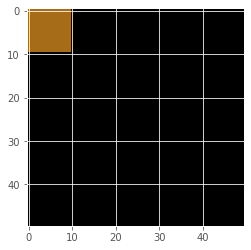

In [ ]:
# ahmed's color grid
v_max = 50;
values = 3;
env = np.zeros([v_max, v_max, values], dtype = np.uint8)
set_color(env, 0, 0, colors = ahmed.colors);
plt.imshow(env);

#### 3.3. Cultural class

In [ ]:
similarity_threshold = 50;
no_of_max_iteration = 1000;

class Culture():
  def __init__(self, v1_max, v2_max) -> None:
    self.v1_max = v1_max;
    self.v2_max = v2_max;
    self.population = {(val1, val2): Agent(val1, val2, v1_max, v2_max)
                        for val1 in range(self.v1_max) for val2 in range(self.v2_max)};
  
  def select_one_agent(self) -> int:
    return random.choice(list(self.population.keys()));
  
  def run(self, time = no_of_max_iteration, th = similarity_threshold) -> None:
    for i in range(time):
      A_index = self.select_one_agent();
      A = self.population[A_index];

      B_index = self.select_one_agent();
      B = self.population[B_index];

      if A.similar(B, th):
        A.immitate(B);

In [ ]:
dimension = 10;
values = 3;

def draw_board(world, iteration = 0, threshold = 100, display = True) -> None:
  v1_max, v2_max, population = world.v1_max, world.v2_max, world.population;
  env = np.zeros([dimension * v1_max, dimension * v2_max, values], dtype = np.uint8);

  for val1 in range(v1_max):
    for val2 in range(v2_max):
      set_color(env = env, x1 = val1, x2 = val2, colors = population[(val1, val2)].colors);
  
  plt.title(f"iter {iteration}");
  if display:
    plt.imshow(env);

#### 3.4. Introduction to Cultural code

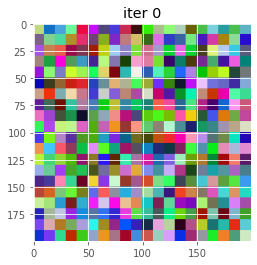

In [ ]:
world = Culture(v1_max = 20, v2_max = 20);
draw_board(world, threshold = 100);

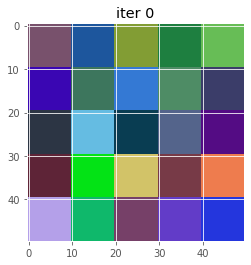

In [ ]:
world = Culture(v1_max = 5, v2_max = 5);
draw_board(world, threshold = 100);

#### 3.5. Simulation of Culture

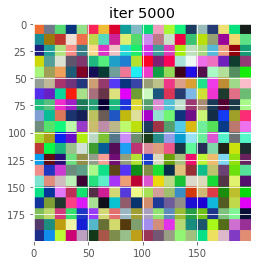

In [ ]:
world = Culture(v1_max = 20, v2_max = 20);
for i in range(0, 6000, 1000):
  world.run(time = i, th = 100)
  draw_board(world, i, threshold = 100);

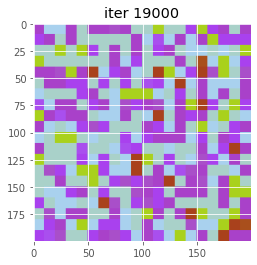

In [ ]:
for i in range(0, 20000, 1000):
  world.run(time = i, th = 100)
  draw_board(world, i, threshold = 100);

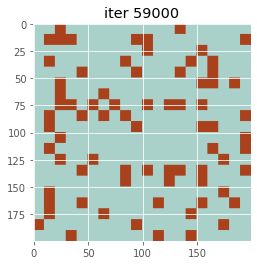

In [ ]:
for i in range(0, 60000, 1000):
  world.run(time = i, th = 100)
  draw_board(world, i, threshold = 100);

# Artificial Collective Intelligence

source: https://youtube.com/playlist?list=PLD4TWcPfbZO8jdml6-od2Yxc2y_qgMB2h

## Lecture 3: Self Organizzing Map (SOM)